# Data Analysis and Data Science
## Be curious about the method 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 4th, 2023

<hr style="border:1px solid black"> </hr>

In [9]:
print("Student Name: FABRE Léna")

Student Name: FABRE Léna


Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 5th, noon to hand-in your Notebook.

In [5]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Genes correlation [25 pts]

In [7]:
### Import and clean the Gene expression cancer 1 dataset
fn = "gene_expression_cancer_1.csv"
data = pd.read_csv(fn)
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


### Global correlation [6 pts]

In [18]:
### Consider the PGR and ESR1 genes. Do the expression of these two genes correlates?
### Consider the entire dataset.
### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.
reg = sp.stats.linregress(x=data.PGR, y=data.ESR1, alternative="two-sided")
reg.rvalue
print("Pearson correlation",reg.rvalue)



Pearson correlation -0.10936924995064938


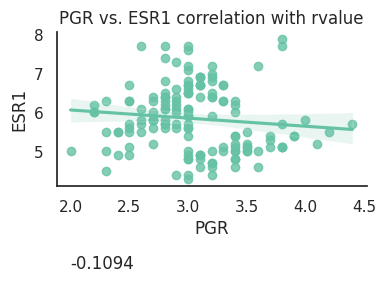

In [19]:
p = sns.regplot(data, x="PGR", y="ESR1")
p.text(2,2,np.round(reg.rvalue,4))

p.set_title("PGR vs. ESR1 correlation with rvalue")

sns.despine()

In [20]:
print("Les valeurs sont dispersées et le coefficient de corrélation de Pearson est proche de 0, cela signifie qu'il n'y a pas de corrélation linéaire entre PGR et ESR1, mais il se peut que les 2 gènes soient tout de même corrélés, à verifier avec le coefficient de Spearman")

Les valeurs sont dispersées et le coefficient de corrélation de Pearson est proche de 0, cela signifie qu'il n'y a pas de corrélation linéaire entre PGR et ESR1, mais il se peut que les 2 gènes soient tout de même corrélés, à verifier avec le coefficient de Spearman


### Grouped correlations [14 pts]

Pearson correlation for cured:  0.7467803732639268
Pearson correlation for recurrence:  0.5280216842864213
Pearson correlation for dead:  0.46200631074260196
Les patients guéris sont majoritairement regroupés autour de valeurs élevées de PGR et ESR1, alors que les patients décédés et ceux avec récidive sont plus dispersés et les valeurs de PGR et ESR1 sont plus variées. De plus, il semble qu'il y ait une correlation entre ESR1 et PGR et les groupes de patients qui partengent les mêmes résultats, notamment entre les patients guéris (coef élevé). Pour les autres groupes, le coefficient de Pearson est plus faible donc la corrélation moins bonne.


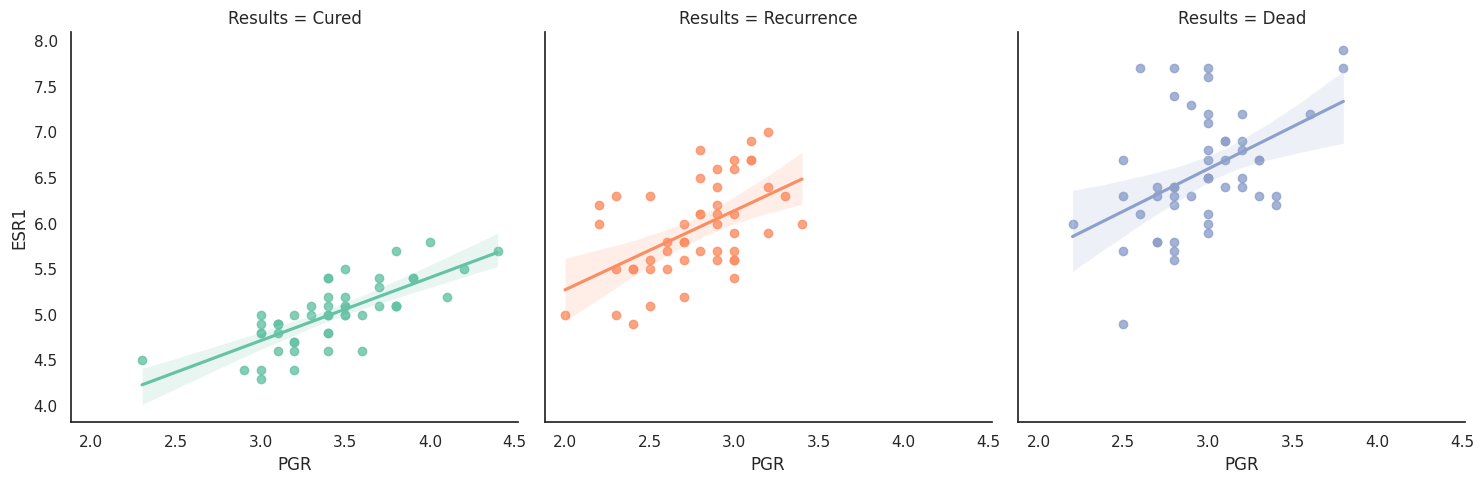

In [11]:
### Consider the same two genes, but assess correlation based on the patient outcomes (a.k.a "Results").
### For each group, return a Pearson correlation coefficient and a plot.
### (You can generate a single plot with all three groups or three individual plots)
### Briefly interpret your results and state if your conclusion differ from the one previously made (Global correlation).

cured = data.loc[data.Results == "Cured", ["ESR1", "PGR"]]
recurrence = data.loc[data.Results == "Recurrence", ["ESR1", "PGR"]]
dead = data.loc[data.Results == "Dead", ["ESR1", "PGR"]]

reg_cured = sp.stats.linregress(cured.PGR, cured.ESR1)
reg_recurrence = sp.stats.linregress(recurrence.PGR, recurrence.ESR1)
reg_dead = sp.stats.linregress(dead.PGR, dead.ESR1)

print("Pearson correlation for cured: ", reg_cured.rvalue)
print("Pearson correlation for recurrence: ", reg_recurrence.rvalue)
print("Pearson correlation for dead: ", reg_dead.rvalue)

sns.lmplot(data, x="PGR", y="ESR1", hue = "Results", col ="Results")

#Interpretation
print("Les patients guéris sont majoritairement regroupés autour de valeurs élevées de PGR et ESR1, alors que les patients décédés et ceux avec récidive sont plus dispersés et les valeurs de PGR et ESR1 sont plus variées. De plus, il semble qu'il y ait une correlation entre ESR1 et PGR et les groupes de patients qui partengent les mêmes résultats, notamment entre les patients guéris (coef élevé). Pour les autres groupes, le coefficient de Pearson est plus faible donc la corrélation moins bonne.")


### Spearman's rank correlation [5 pts]

In [64]:
### Calculate the Spearman' rank correlations for the four comparisons made previously.
### (Global dataset and the three goups)
### Do the results differ? if so, do the conlusions also differ? 
### Briefly explain what are the new conclusions.

#PGR and ESR1 within the whole data set
speaR = sp.stats.spearmanr(data.ESR1, data.PGR, alternative="two-sided" )
print("Spearman coefficient within the whole data set:", speaR.statistic)

#PGR and ESR1 regarding the disease outcome
speaR_cured = sp.stats.spearmanr(cured.ESR1, cured.PGR, alternative="two-sided" )
print("Spearman coefficient within the cured:", speaR_cured.statistic)

speaR_recurrence = sp.stats.spearmanr(recurrence.ESR1, recurrence.PGR, alternative="two-sided" )
print("Spearman coefficient within the recurrences:", speaR_recurrence.statistic)

speaR_dead = sp.stats.spearmanr(dead.ESR1, dead.PGR, alternative="two-sided" )
print("Spearman coefficient within the dead:", speaR_dead.statistic)

#Interprétation
print("Les coefficients de Spearman confirment les observations des coefficients de Pearson, avec une faible corrélation globale (coef proche de 0 = pas de monotonicité entre les variables) mais des corrélations positives au sein des groupes de patients, notamment chez les patients guéris.Les nouvelles conclusions montrent qu'une analyse segmentée selon les résultats des patients révèle des corrélations entre PGR et ESR1 qui ne sont pas visibles dans l'analyse globale. Ainsi, les conclusions diffèrent car elles montrent l'importance de segmenter les données pour obtenir une compréhension précise des relations entre les variables.")


Spearman coefficient within the whole data set: -0.15945651848582867
Spearman coefficient within the cured: 0.768608507372937
Spearman coefficient within the recurrences: 0.5180736821877614
Spearman coefficient within the dead: 0.4389928351262457
Les coefficients de Spearman confirment les observations des coefficients de Pearson, avec une faible corrélation globale (coef proche de 0 = pas de monotonicité entre les variables) mais des corrélations positives au sein des groupes de patients, notamment chez les patients guéris.Les nouvelles conclusions montrent qu'une analyse segmentée selon les résultats des patients révèle des corrélations entre PGR et ESR1 qui ne sont pas visibles dans l'analyse globale. Ainsi, les conclusions diffèrent car elles montrent l'importance de segmenter les données pour obtenir une compréhension précise des relations entre les variables.
